In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)
plt.style.use('nb/nb_plotsheet.mplstyle')
#
figpath = "data/plot/paper/suppinf/"

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
mystr='toppe'
mystr+'.'*(80-len(mystr))

'toppe...........................................................................'

In [3]:
import scipy.linalg as scla
l = Lattice2D(64)
l.flip_sel_edges(l.neg_weights_dict['single']['G'])
def eigen(A, mode: str = 'numpy'):
    if mode == 'numpy':
        eigenValues, eigenVectors = np.linalg.eigh(A)
    elif mode.startswith('scipy'):
        if mode.endswith('sparse'):
            eigenValues, eigenVectors = scsp.linalg.eigsh(A.astype(float))
        elif mode.endswith('dense'):
            eigenValues, eigenVectors = scla.eigh(A.astype(float))
    idx = np.argsort(eigenValues)[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return (eigenValues, eigenVectors)
A = l.Adj


In [29]:
Adense = A.todense()

In [50]:
2**(np.arange(3, 9))

array([  8,  16,  32,  64, 128, 256])

In [41]:
aigv, aigV = eigen(A, 'scipy_sparse')#eigen(Adense, 'scipy_dense')#eigen(Adense, 'numpy')

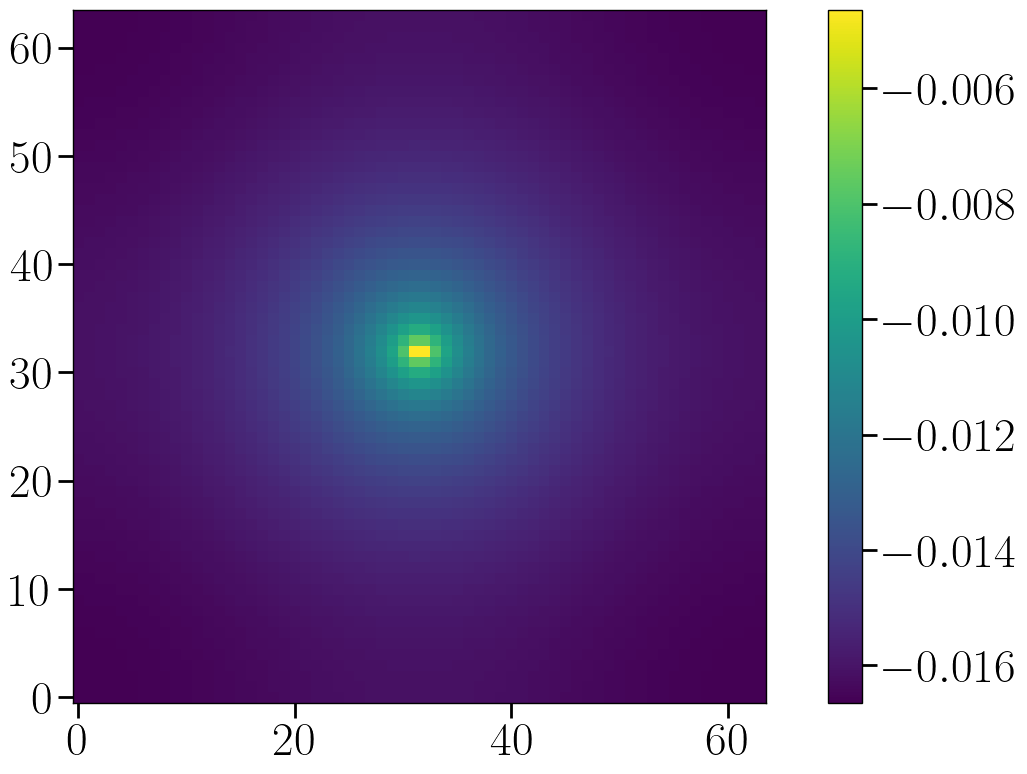

In [43]:
plt.imshow(-unravel_1d_to_2d_nodemap(aigV.T[0], l.invnode_map))
plt.colorbar()

In [2]:
# l = Lattice2D(128, pflip=0.1, with_positions=True)
# l.flip_sel_edges(l.neg_weights_dict['randZERR']['G'])
# nx.draw(l.G, pos = l.get_pos(), edge_color=l.get_edge_color(), node_size=10)
# l.compute_k_eigvV()

In [3]:
List = 2**np.arange(4, 9)
plist = np.concatenate((np.logspace(-3, np.log10(0.05), num=5),
                        np.linspace(1e-2, 0.2, num=10),
                        np.linspace(0.2, 0.5, num=5)))
geometry_cell_dict = {'squared': ['single', 'square', 'cross'],
                      'triangular': ['single', 'triangle', 'cross'],
                      'hexagonal': ['single', 'hexagon', 'cross']}

In [4]:
dict_max = {}
for geo, cellst in geometry_cell_dict.items():
    dict_max[geo] = {}
    for c in cellst:
        dict_max[geo][c] = {}
        for L in List:
            l = Lattice2D(L, geo=geo, sgpath="cluster_data/")
            search_dir = l.phtrapath
            output_file_name = os.path.join(search_dir, f'cat_{c}.txt')
            if not os.path.exists(output_file_name):
                print(search_dir, end='\r')
                #
                matching_files = find_matching_files(search_dir, c)
                # Concatenate the found files into the output file
                with open(output_file_name, 'w') as outfile:
                    for fname in matching_files:
                        # Construct the full path to open the file
                        file_path = os.path.join(search_dir, fname)
                        with open(file_path, 'r') as infile:
                            outfile.write(infile.read())
            print("loading ", search_dir, end='\r')
            dict_max[geo][c][L] = np.loadtxt(output_file_name)
            # Optionally, write a newline character between files

/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=28_L2=16/cat_single.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)
/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=56_L2=32/cat_single.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)


/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=110_L2=64/cat_single.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)


/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=222_L2=128/cat_single.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)


/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=444_L2=256/cat_single.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)
/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=28_L2=16/cat_hexagon.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)
/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=56_L2=32/cat_hexagon.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)
/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=110_L2=64/cat_hexagon.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)


/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=222_L2=128/cat_hexagon.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)


/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=444_L2=256/cat_hexagon.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)
/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=28_L2=16/cat_cross.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)
/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=56_L2=32/cat_cross.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)
/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=110_L2=64/cat_cross.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)


/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=222_L2=128/cat_cross.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)


/tmp/ipykernel_21797/3407602187.py:22: UserWarning: loadtxt: input contained no data: "data/cluster_data/l2d_hexagonal/phtra/L1=444_L2=256/cat_cross.txt"
  dict_max[geo][c][L] = np.loadtxt(output_file_name)


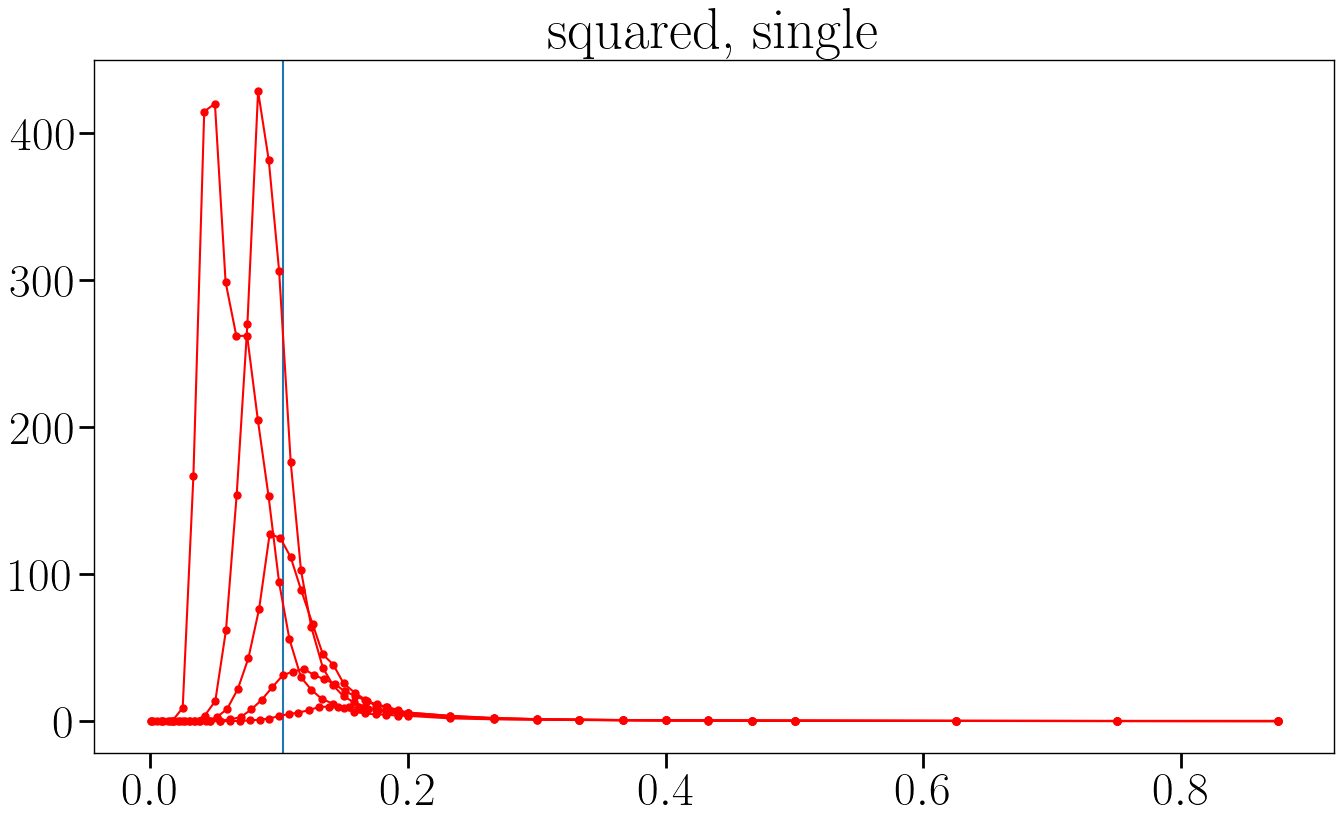

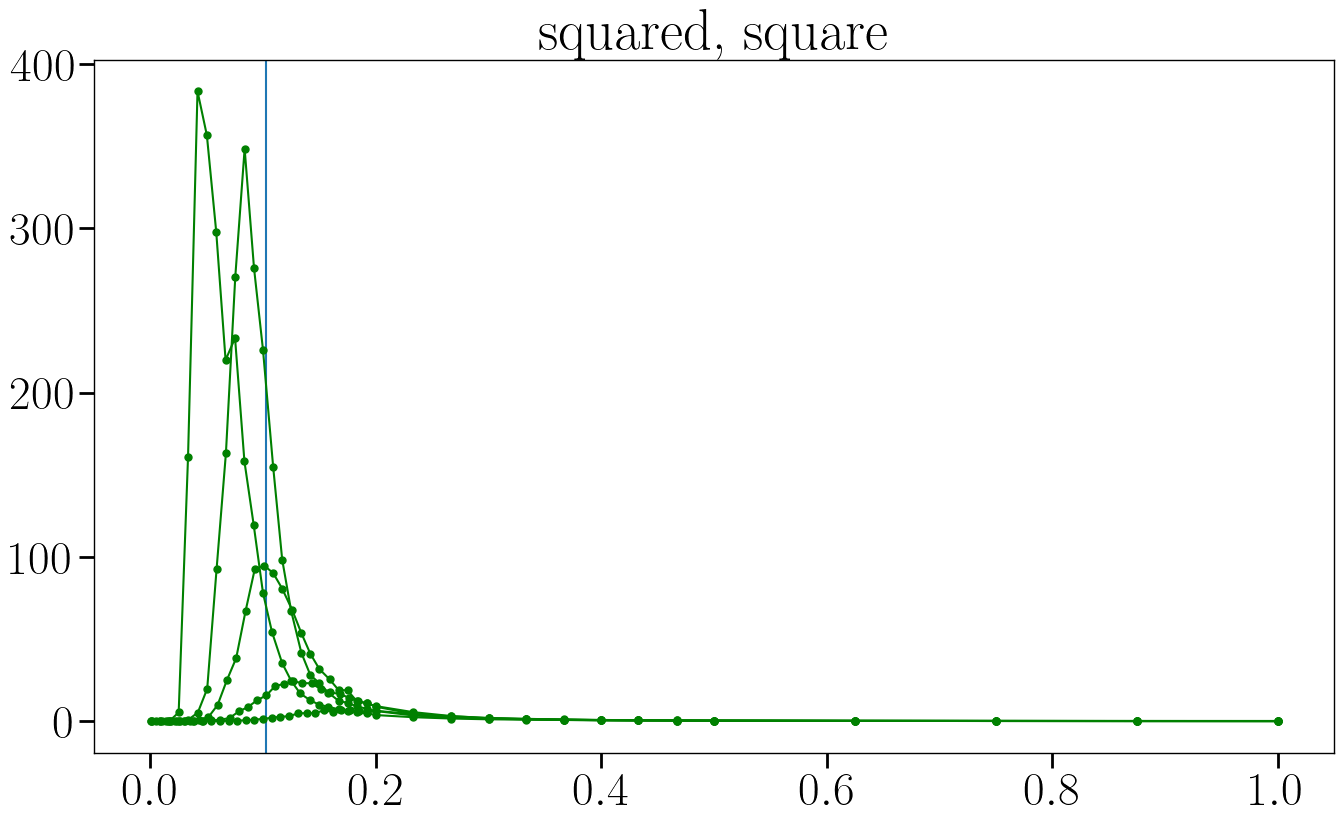

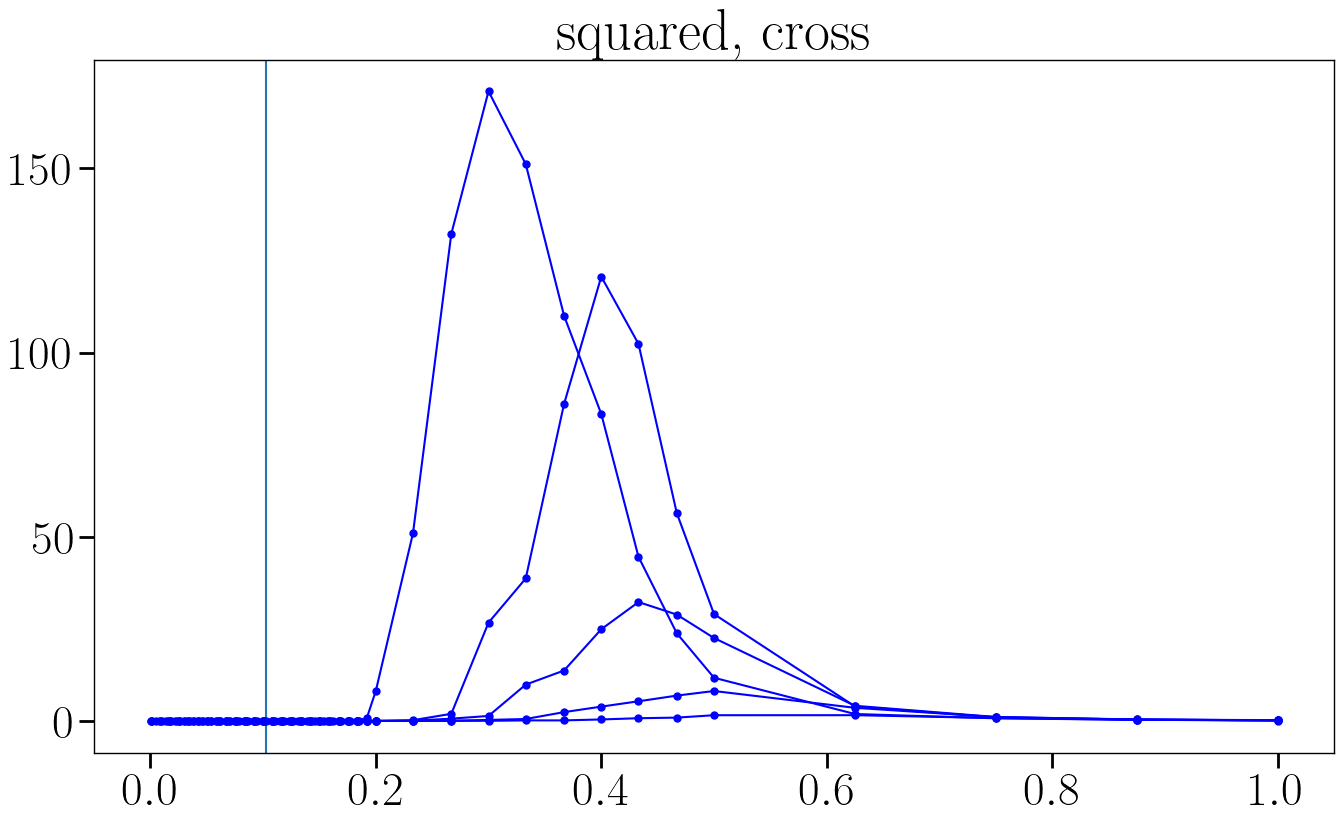

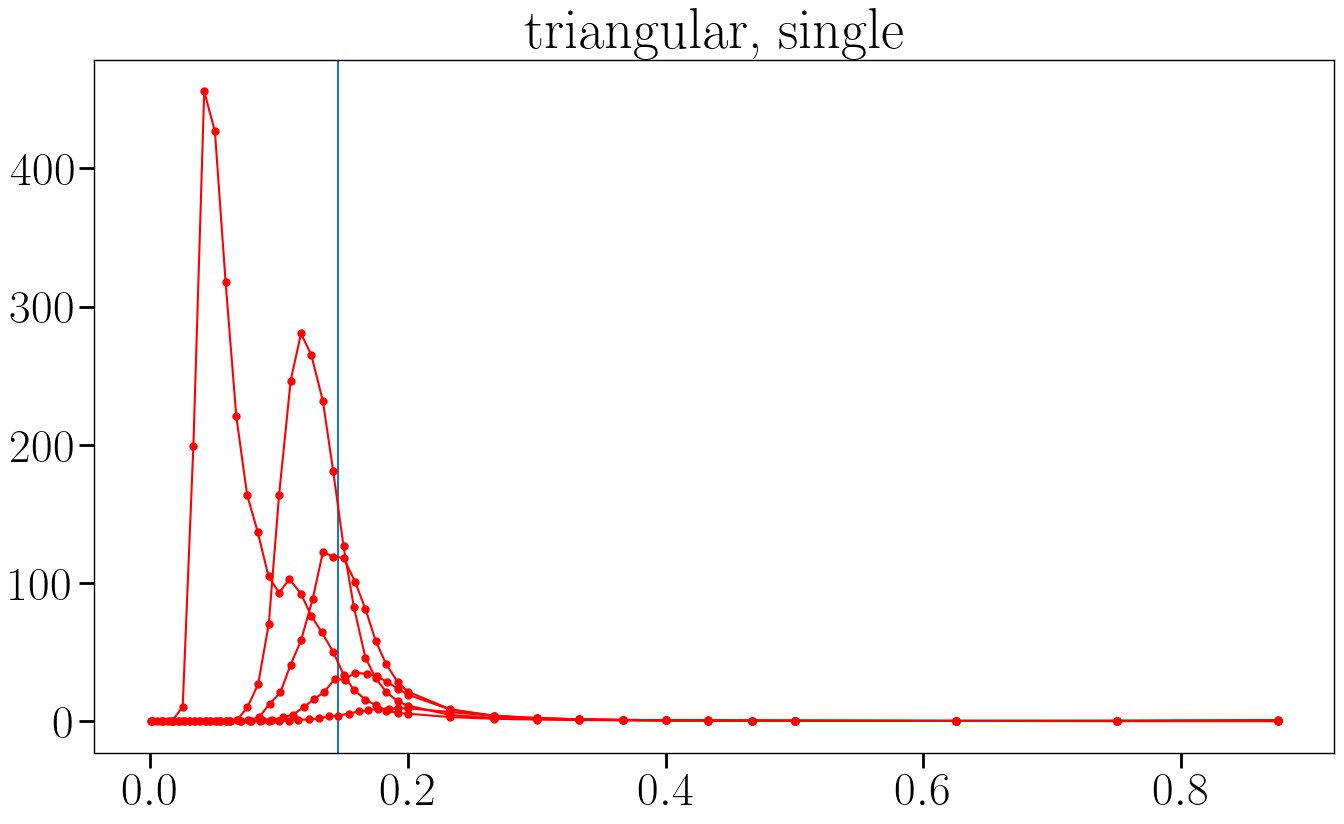

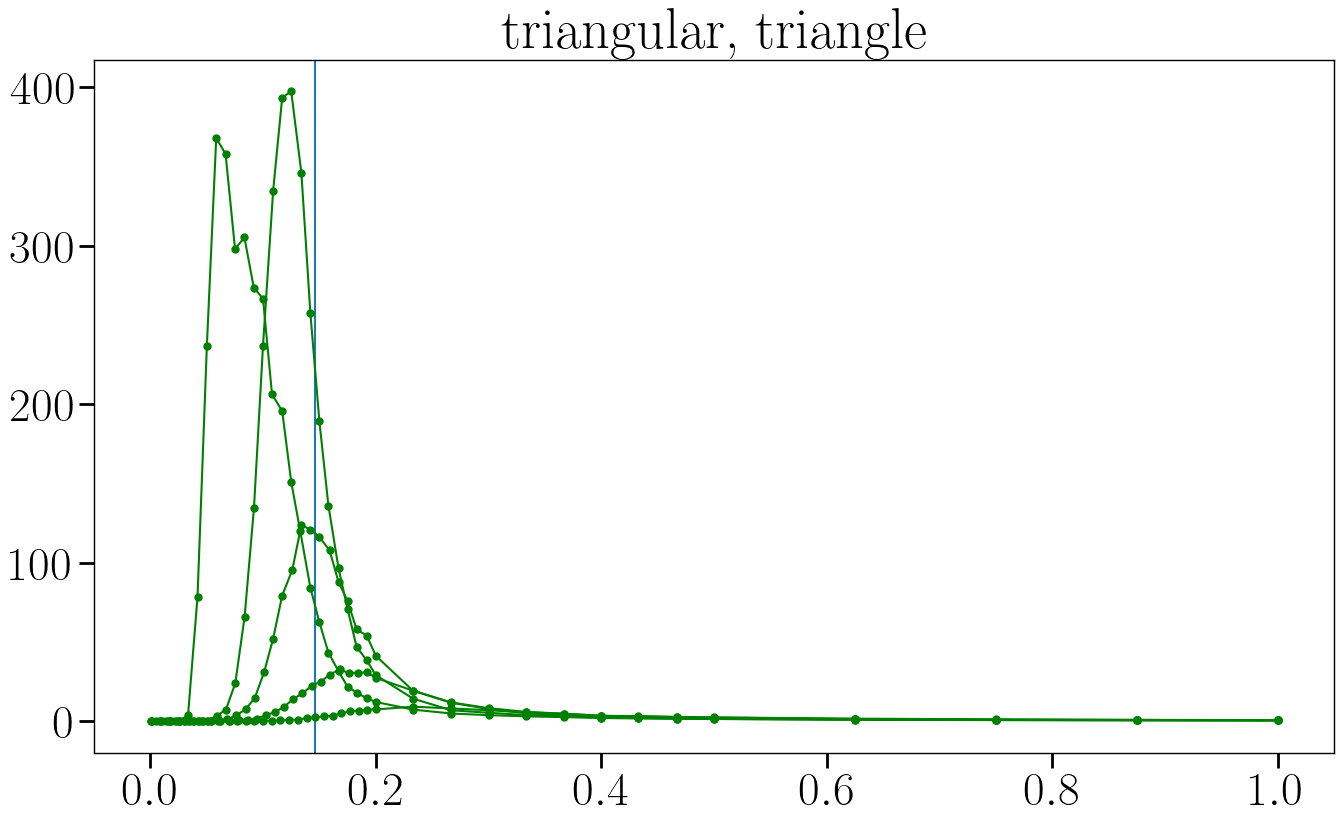

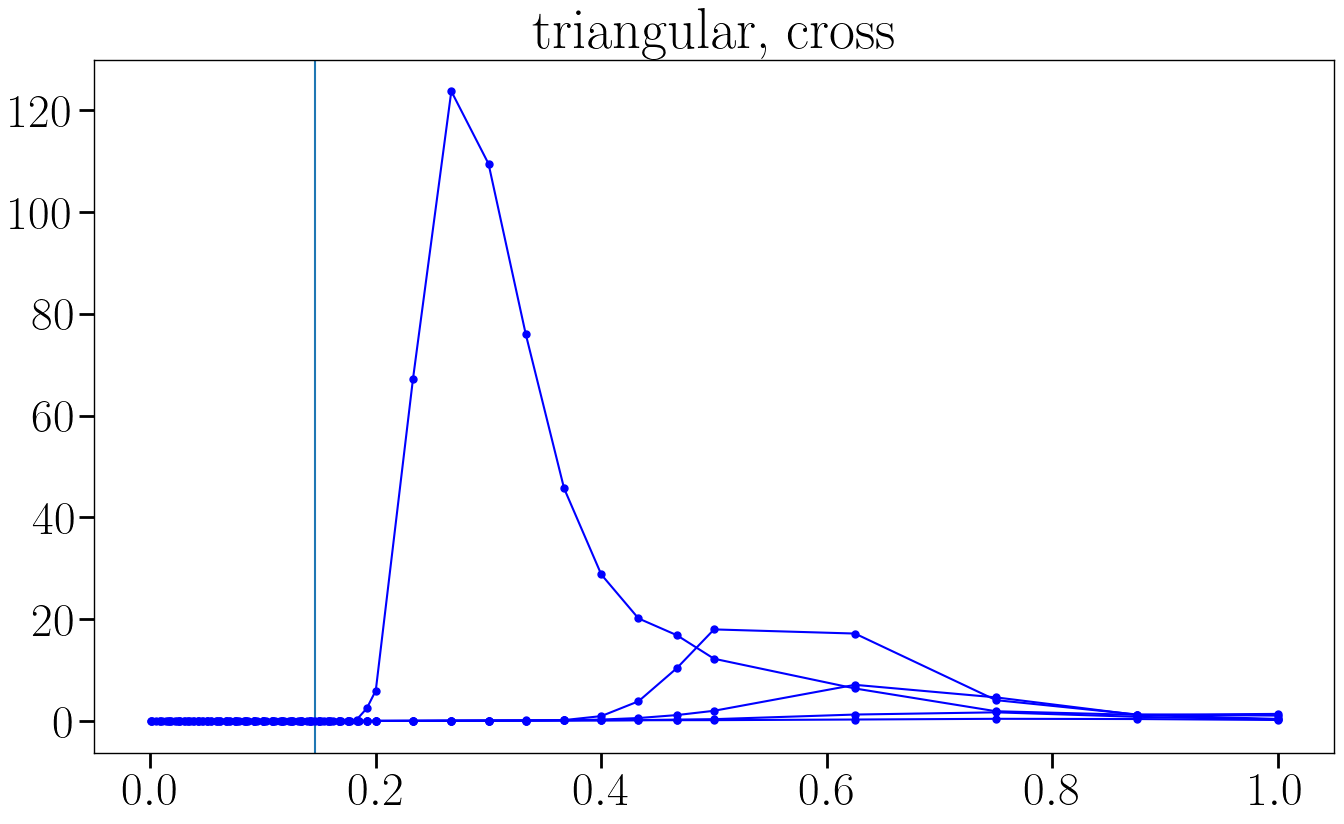

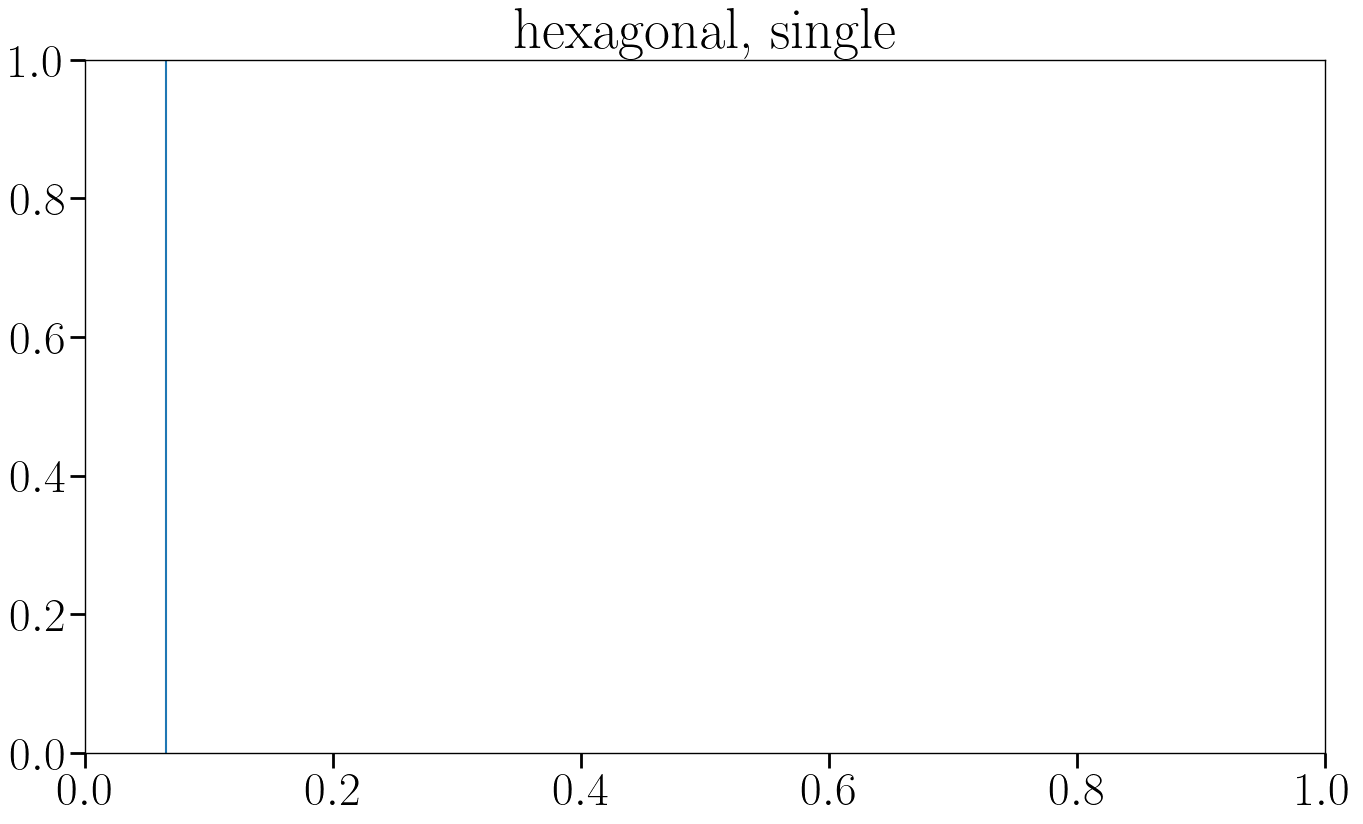

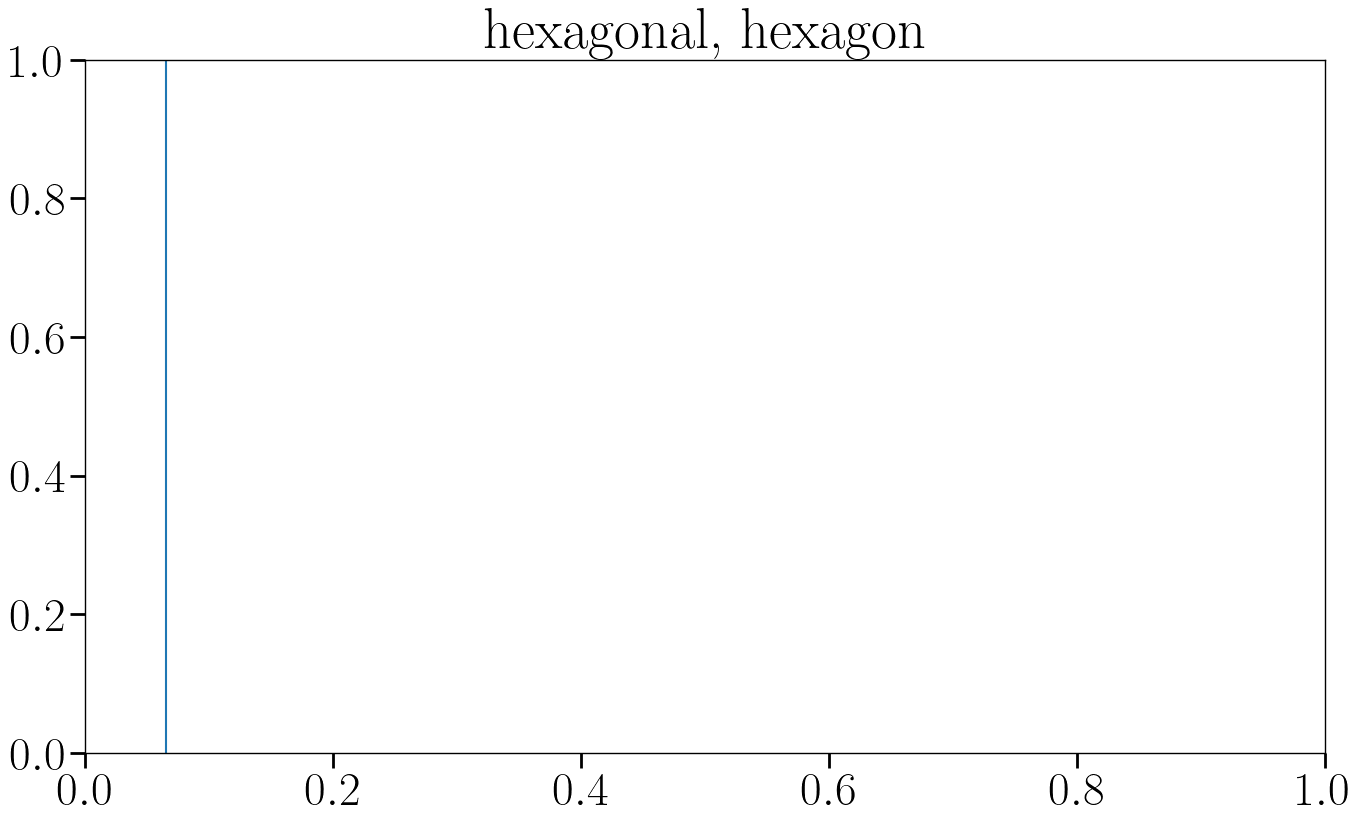

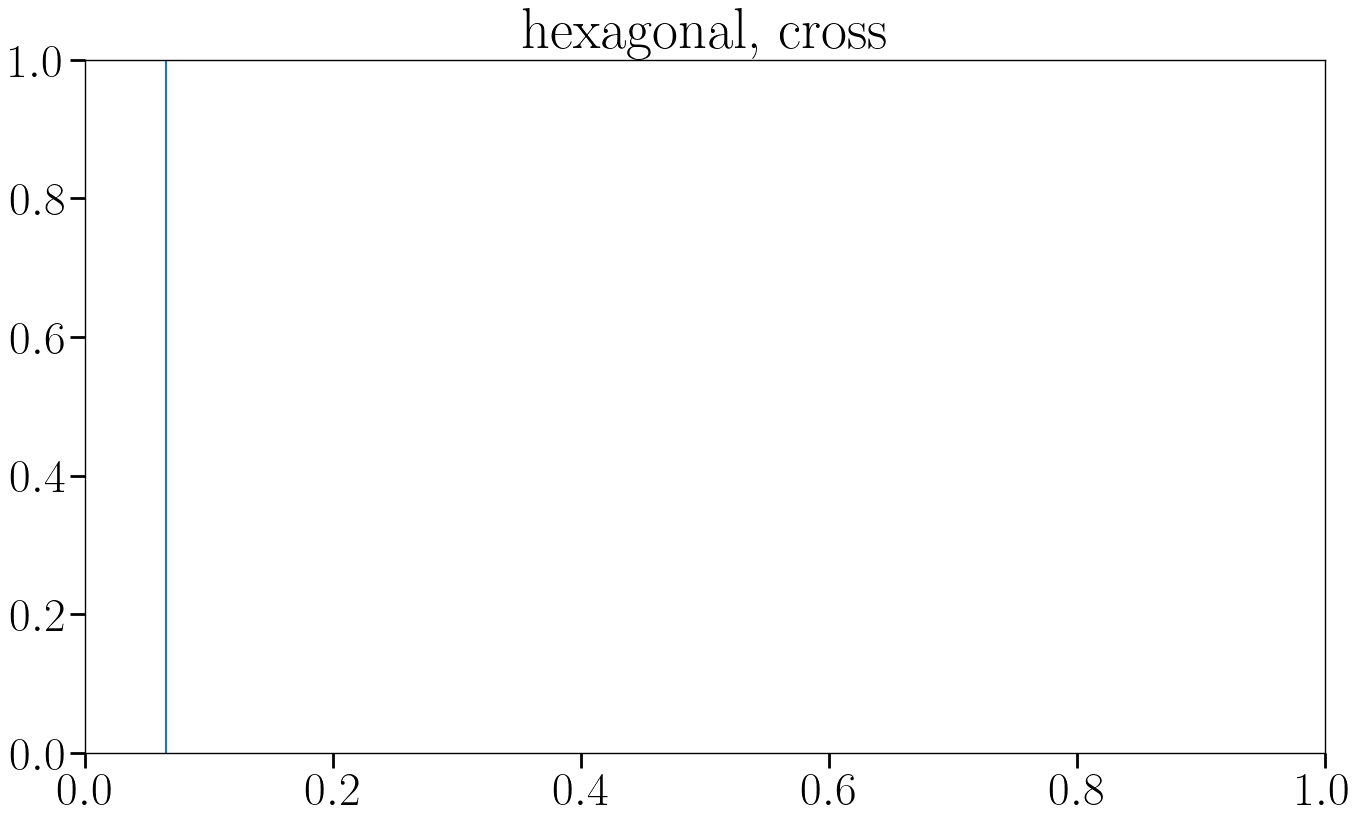

In [7]:
p_c = {'squared': 0.103,
    'triangular': 0.146,
    'hexagonal': 0.065}
for geo, cellst in geometry_cell_dict.items():
    for c, cc in zip(cellst, ['red', 'green', 'blue']):
        fig, ax = plt.subplots()
        ax.set_title(f'{geo}, {c}')
        ax.axvline(p_c[geo])
        for L in list(dict_max[geo][c].keys()):
            arr = dict_max[geo][c][L]
            column_index = 0
            try:
                sorted_indices = np.argsort(arr[:, column_index])
                sorted_arr = arr[sorted_indices]
                ax.plot(sorted_arr[:, 0], sorted_arr[:, -2]*L**2, 'o-', c=cc, ms=5)
            except IndexError:
                pass